# 1. A)

In [8]:
from sklearn import datasets
import numpy as np
X, y = datasets.make_blobs(n_samples=1000, centers=4,
cluster_std=[np.random.rand()*2, np.random.rand()*2,
np.random.rand()*2, np.random.rand()*2])

In [12]:
X.shape

(1000, 2)

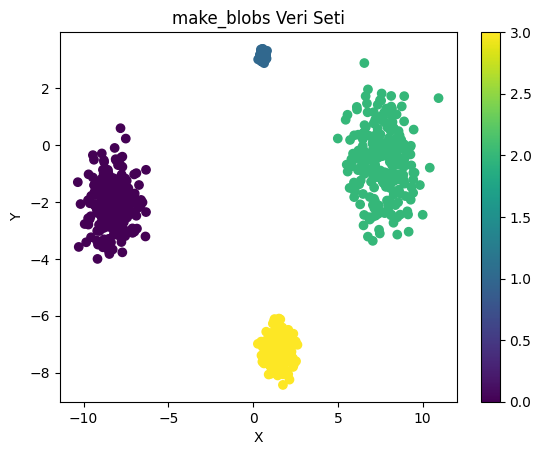

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('make_blobs Veri Seti')
plt.colorbar()
plt.show()

En optimal küme sayısı (k): 4


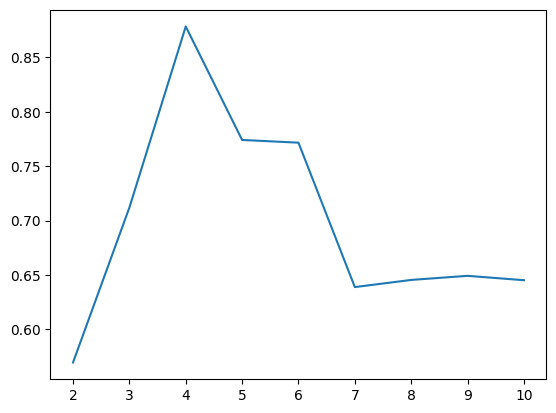

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
k_values = []

k_values_range=range(2, 11)
for k in k_values_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
    k_values.append(k)

# En yüksek siluet skoruna sahip küme sayısını elde edin
optimal_k = k_values[np.argmax(silhouette_scores)]

print("En optimal küme sayısı (k):", optimal_k)
plt.plot(k_values_range,silhouette_scores)

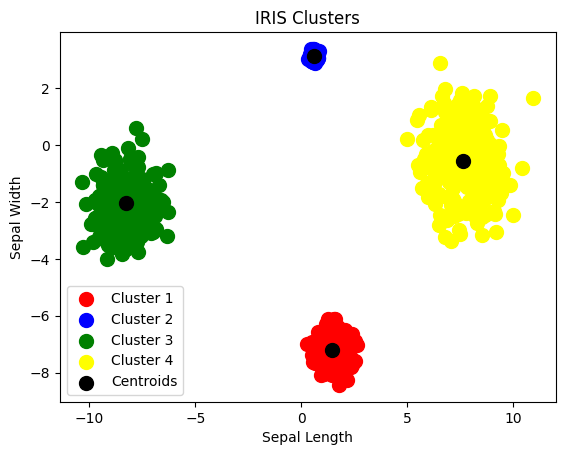

In [17]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0) # optimal k değerine göre kümeleme gerçekleştiriyoruz.
y_kmeans = kmeans.fit_predict(X) # Veri setimiz üzerinden tahmin işlemi gerçekleştiriyoruz
 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('IRIS Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# 1. B)

In [22]:
kmeans = KMeans(n_clusters=optimal_k,n_init=10) # Kmeans nesnemizi oluşturuyoruz.
kmeans.fit(X) #Veri setimiz üzerinde eğitim işlemi gerçekleştiriyoruz.

labels = kmeans.labels_ #Etiketlerimizi elde ediyoruz.
centroids = kmeans.cluster_centers_ #Kümelerimizin merkezi noktalarını alıyoruz.

def find_farthest_points():
    distances = kmeans.transform(X) # Her veri noktasının kümelerin merkezine olan uzaklıklarını hesaplıyoruz.
    farthest_indices = np.argmax(distances, axis=0) # maksimum değere sahip olan kümenin indexi alınır.
    farthest_points = X[farthest_indices, :] # En uzak noktaların koordinatlarını alıyoruz.
    return farthest_points

farthest_points = find_farthest_points()
threshold = np.mean(np.max(kmeans.transform(farthest_points), axis=1))
#threshold değeri en uzak noktalardan merkezlere olan maksimum uzaklıkların ortalamasıdır.

def classify_point(point):
    distance = np.min(kmeans.transform([point]))
    if distance > threshold:
        return "Anomali"
    else:
        return int(kmeans.predict([point])[0])

In [23]:
test_X=input("Merhaba test noktasının X kordinatı giriniz \n")
test_Y=input("Merhaba test noktasının Y kordinatı giriniz \n")
point = np.array([test_X,  test_Y])
classification = classify_point(point)
print("Sınıf:", classification)

Merhaba test noktasının X kordinatı giriniz 
1
Merhaba test noktasının Y kordinatı giriniz 
2
Sınıf: 3


# 2. 

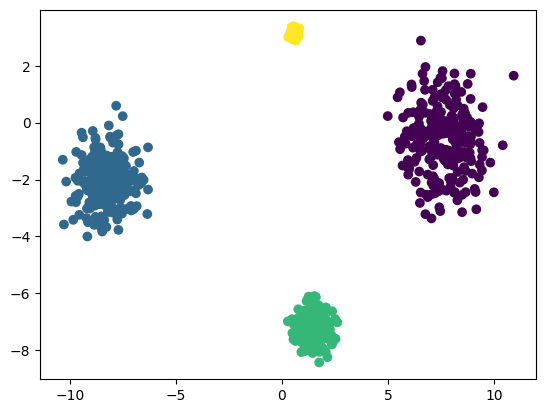

In [24]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
y_pred = hierarchical_clustering.fit_predict(X)

# Sonuçları görüntüle
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

En optimal küme sayısı (k): 4


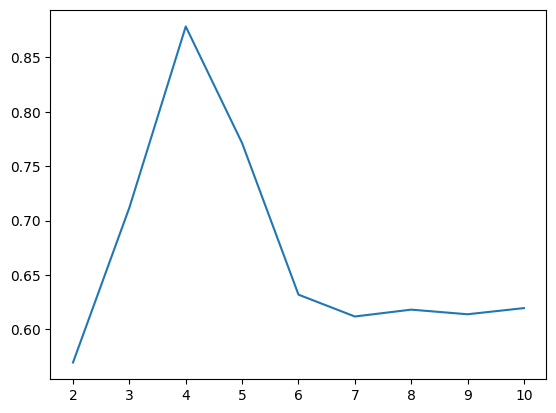

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 
k_values = []
k_values_range=range(2, 11)

for k in k_values_range:
    #Hiyarerşik kümeleme yapmak için AgglomerativeClustering nesnesi oluşturlmuştur
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k,
                                                      linkage="ward") 
    # kümeleme işleminin gerçekleştirilmesi ile birlikte y_pred değerleri elde edilmekte.
    y_pred = hierarchical_clustering.fit_predict(X) 
    silhouette_scores.append(silhouette_score(X, y_pred))
    k_values.append(k)

# En yüksek siluet skoruna sahip küme sayısının elde edilmesi
optimal_k = k_values[np.argmax(silhouette_scores)]

print("En optimal küme sayısı (k):", optimal_k)
plt.plot(k_values_range,silhouette_scores)

# 3. Soru

In [26]:
from sklearn import datasets
import numpy as np
X, y = datasets.make_moons(n_samples=1000, noise=0.05,
random_state=np.random.randint(80))


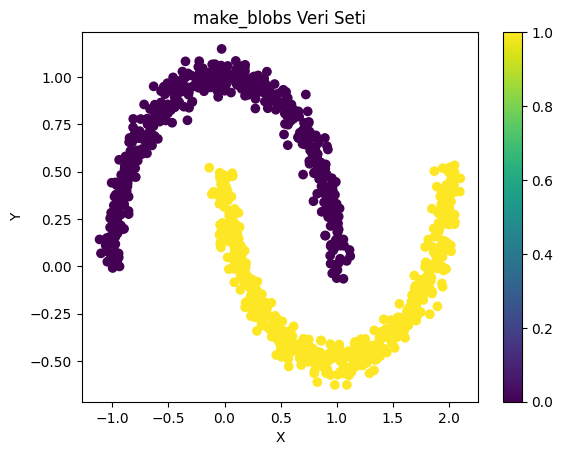

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('make_blobs Veri Seti')
plt.colorbar()
plt.show()

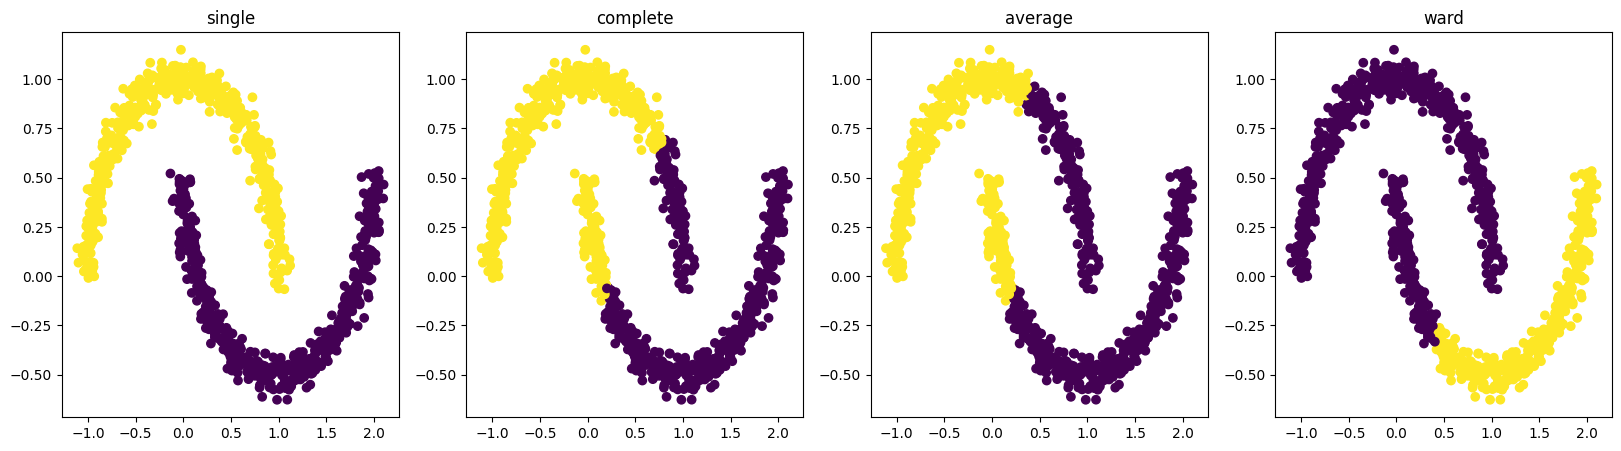

In [30]:
from sklearn.cluster import AgglomerativeClustering
fig, ax = plt.subplots(1,4,figsize=(20,5))
link =['single','complete','average','ward']
for i in range(4):
    model = AgglomerativeClustering(n_clusters=2, linkage=link[i])

    labels = model.fit_predict(X)

    ax[i].scatter(X[:,0],X[:,1], c=labels)
    ax[i].set_title(link[i])

plt.show()

En optimal küme sayısı (k): 2


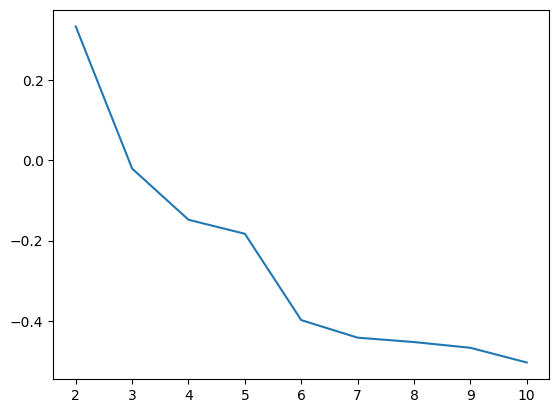

In [31]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = []
k_values_range=range(2, 11)

for k in k_values_range:
    #Hiyarerşik kümeleme yapmak için AgglomerativeClustering nesnesi oluşturlmuştur
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k, linkage="single")
    # kümeleme işleminin gerçekleştirilmesi ile birlikte y_pred değerleri elde edilmekte.
    y_pred = hierarchical_clustering.fit_predict(X)
    #silhouette skorları listeye ekleme
    silhouette_scores.append(silhouette_score(X, y_pred))
    # k değerini listeye ekleme
    k_values.append(k)

# En yüksek siluet skoruna sahip küme sayısını elde etme
optimal_k = k_values[np.argmax(silhouette_scores)]

print("En optimal küme sayısı (k):", optimal_k)
plt.plot(k_values_range,silhouette_scores)

# 4. soru

## 4. A)

In [38]:
from sklearn import datasets, manifold
import numpy as np
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  
from matplotlib import ticker
from sklearn import datasets, manifold
n_samples = 1500
#Veri seti olluşturma
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

In [39]:
S_points.shape

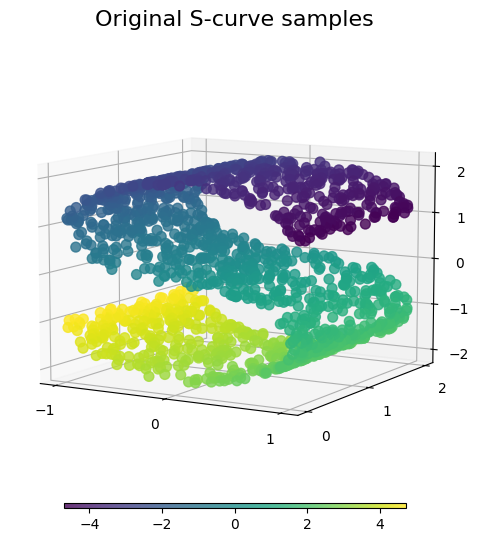

In [34]:
#çizim için gerekli fonksiyonları tanımlıyoruz
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

In [37]:
import matplotlib.pyplot as plt #çiziler için
import numpy as np #matematiksel işlemler için
from sympy import Matrix, init_printing
#verisetini incele
print("X veriseti (n x p)")
print("X verisetindeki örnek sayısı (n): " + str(S_points.shape[0]))
print("X verisetindeki öznitelik sayısı (p): " + str(S_points.shape[1]))

init_printing() #sympy modülündeki matematiksel ifadelerin güzel bir şekilde yazdırılabilmesi için
#sympy modülündeki Matrix fonksiyonunu kullanarak S_points dizisini matris olarak temsil eder ve güzel bir şekilde yazdırır.
display(Matrix(S_points))


X veriseti (n x p)
X verisetindeki örnek sayısı (n): 1500
X verisetindeki öznitelik sayısı (p): 3


⎡ 0.443998675879204   0.893586640738162   -0.103972558557768 ⎤
⎢                                                            ⎥
⎢ 0.897240970661908    1.67398073057737    -1.44154121049532 ⎥
⎢                                                            ⎥
⎢  0.8240493010794    0.443648061019992   -0.433481907269898 ⎥
⎢                                                            ⎥
⎢ 0.410510677801072   0.987890511324403   -0.0881442090926303⎥
⎢                                                            ⎥
⎢-0.659036187787243    1.85923747889351    0.247888769405177 ⎥
⎢                                                            ⎥
⎢ 0.980896874139854    1.33442941357335   -0.805471538579408 ⎥
⎢                                                            ⎥
⎢-0.554886621649958    1.59615803951199    0.168074019450109 ⎥
⎢                                                            ⎥
⎢-0.523352797206908    1.10198794037097    -1.8521161010424  ⎥
⎢                                                      

In [40]:
#sutünların ortalamasını bul yani özniteliklerin ortalama değerini bul
np.mean(S_points, axis=0)

array([-0.03348868,  1.01481201,  0.01347172])

In [42]:
#Sutunları merkez ortalanması
S_points_c = S_points-np.mean(S_points, axis=0) #sutunların ortalamasını öznitelik matrisinden çıkar 
init_printing()
display(Matrix(S_points_c))#yazdır

⎡0.477487352258794   -0.121225365805426   -0.117444283454815 ⎤
⎢                                                            ⎥
⎢0.930729647041499    0.659168724033779    -1.45501293539237 ⎥
⎢                                                            ⎥
⎢ 0.85753797745899   -0.571163945523596   -0.446953632166945 ⎥
⎢                                                            ⎥
⎢0.443999354180662   -0.0269214952191861  -0.101615933989678 ⎥
⎢                                                            ⎥
⎢-0.625547511407652   0.84442547234992     0.23441704450813  ⎥
⎢                                                            ⎥
⎢ 1.01438555051944    0.319617407029761   -0.818943263476456 ⎥
⎢                                                            ⎥
⎢-0.521397945270367   0.581346032968406    0.154602294553062 ⎥
⎢                                                            ⎥
⎢-0.489864120827318  0.0871759338273839    -1.86558782593945 ⎥
⎢                                                      

In [43]:
#SVD kullanarak matrisi ayır
U, S, Vh = np.linalg.svd(S_points_c, full_matrices=False)

In [45]:
init_printing()
display(Matrix(Vh))

⎡-0.0539491216100625  -0.00838928169264674  0.998508443745061 ⎤
⎢                                                             ⎥
⎢ 0.997512817152115   -0.0458789087579828   0.0535098621604198⎥
⎢                                                             ⎥
⎣-0.0453615684776566   -0.998911780731341   -0.010843542843036⎦

In [46]:
V = Vh # Vh matrisinin satırları bileşenlerin yönünü veriyor

In [47]:
#noktaları yeni düzleme dönüştür
pca1 = np.matmul(S_points_c, V[0,:])
pca2 = np.matmul(S_points_c, V[1,:])
pca3 = np.matmul(S_points_c, V[2,:])


In [48]:
S

array([53.55605663, 27.872231  , 22.44411241])

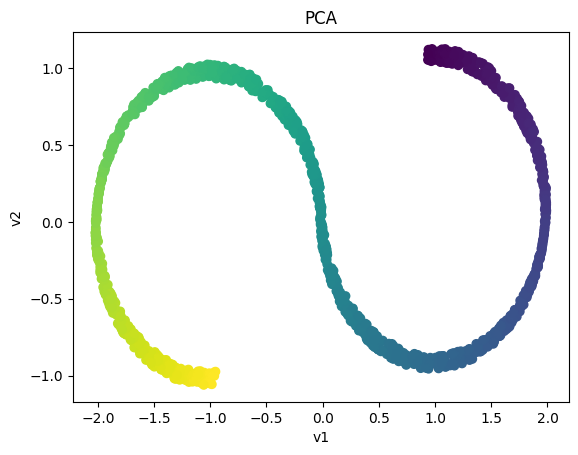

In [49]:
plt.scatter(pca1, pca2, c = S_color)
plt.title('PCA')
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

array([0.69133634, 0.87858368, 1.        ])

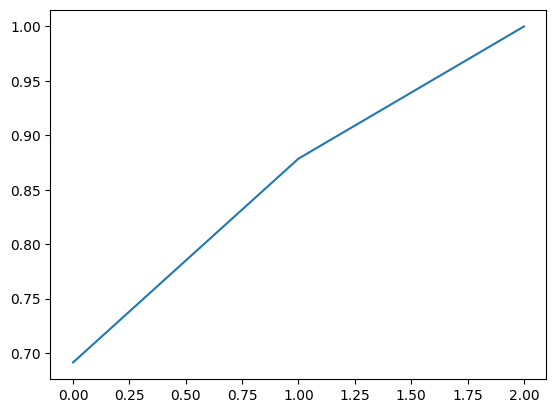

In [50]:
#açıklanan varyans miktarının çizimi
d = (S*S)/(S_points_c.shape[0])#(s^2)/n açıklanan varyans miktarını veriyor
PVE = np.cumsum(d/(np.sum(d)))#çizimde açıklanan varyans miktarının artarak gözükmesi için cumsum kullanıyoruz ve yüzde için toplama bölüyoruz
plt.plot(PVE) #eğriyi çizdir
PVE # ve değerleri yazdır

## 4. B)

(1500, 1500)


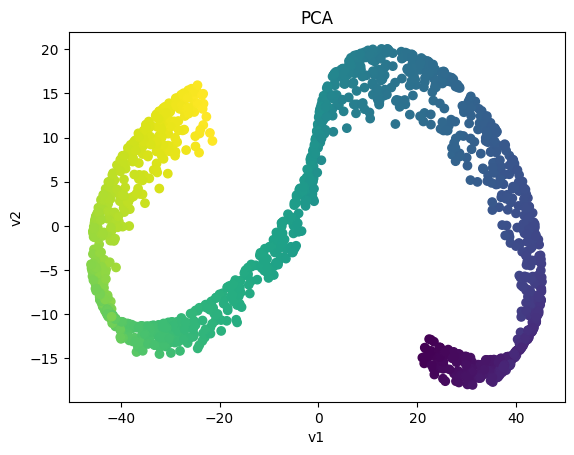

In [51]:
# Noktalar arası uzaklıkları hesaplama
distances = np.sqrt(np.sum((S_points[:, np.newaxis] - S_points) ** 2, axis=2))
print(distances.shape)

mean_centered = distances-np.mean(distances, axis=0) #sutunların ortalamasını öznitelik matrisinden çıkar 

U, S, Vh = np.linalg.svd(mean_centered, full_matrices=False)

# Özdeğerleri ve özvektörleri hesaplama
V = Vh # Vh matrisinin satırları bileşenlerin yönünü veriyor

#noktaları yeni düzleme dönüştür
pca1 = np.matmul(mean_centered, V[0,:])
pca2 = np.matmul(mean_centered, V[1,:])
pca3 = np.matmul(mean_centered, V[2,:])

plt.scatter(pca1, pca2, c = S_color)
plt.title('PCA')
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

# 5. Soru

In [52]:
import matplotlib.pyplot as plt
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker
from sklearn import datasets, manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

In [53]:
S_points.shape # 3 boyutlu bir S şeklinde manifold

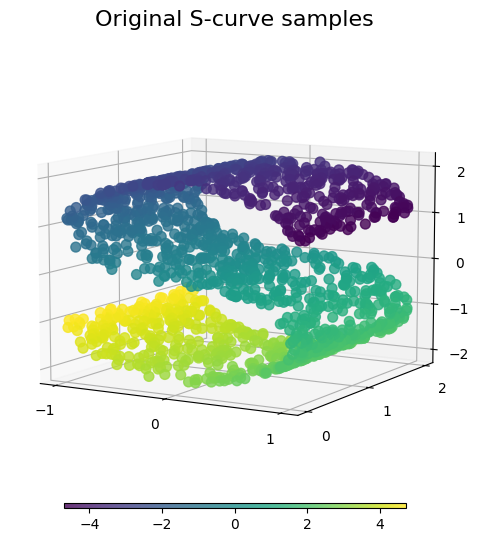

In [54]:
plot_3d(S_points, S_color, "Original S-curve samples")

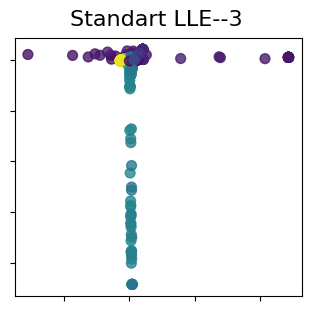

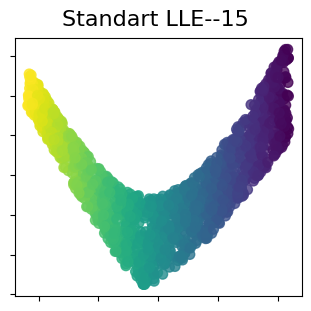

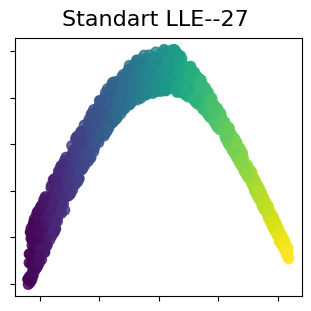

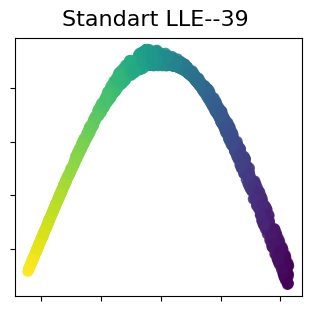

In [65]:
for i in range(3,49,12):
    n_neighbors = i  
    n_components = 2  # indirgemek istediğimiz uzayın boyutları
    #parametreleri tanımla
    params = {
        "n_neighbors": n_neighbors,
        "n_components": n_components,
        "eigen_solver": "auto",
        "random_state": 0,
    }

    lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params) #standart lle fonksiyonuna parametreleri belirt
    S_standard = lle_standard.fit_transform(S_points) # Hem gerekli hesapları yap hemnde indigenmiş uzaya dönüşümü yap
    plot_2d(S_standard, S_color, f"Standart LLE--{i}")
    plt.show()

# 6. Soru

In [110]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, manifold

# Veri setini oluşturma
n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

# LLE algoritması ile veri setini indirgeme
n_neighbors = 10
n_components = 2
lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,method="ltsa")
X_lle = lle.fit_transform(S_points)

# En uzak iki noktayı bulma
distances = np.linalg.norm(X_lle[:, np.newaxis] - X_lle, axis=2)
max_distance_idx = np.unravel_index(np.argmax(distances), distances.shape)
max_distance_points = S_points[[max_distance_idx[0]], :], S_points[[max_distance_idx[1]], :]

# Yeni bir noktanın geometrik şekil üzerinde veya içinde olup olmadığını kontrol etme
new_point = np.array([[0.5, 0.5, 0.5]])  # Örnek bir yeni nokta
new_point_lle = lle.transform(new_point)
new_point_distance = np.linalg.norm(X_lle - new_point_lle, axis=1)
is_inside_shape = np.min(new_point_distance) <= np.max(distances)

distance_between_points = np.linalg.norm(max_distance_points[0] - max_distance_points[1])


# Sonuçları yazdırma
print("En uzak iki nokta:")
print(max_distance_points)
# Sonucu yazdırma
print("En uzak iki nokta arasındaki uzaklık:", distance_between_points)

print("Yeni noktanın geometrik şekil üzerinde veya içinde olması:", is_inside_shape)

En uzak iki nokta:
(array([[0.98368367, 1.97817687, 1.17990673]]), array([[-0.99066563,  0.0185689 , -1.13631435]]))
En uzak iki nokta arasındaki uzaklık: 3.6198064410189055
Yeni noktanın geometrik şekil üzerinde veya içinde olması: True


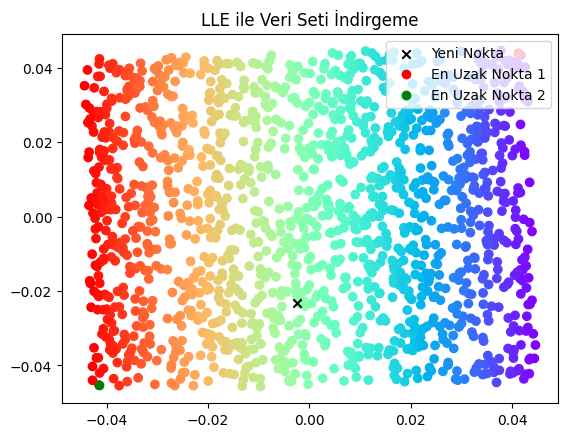

In [111]:
# Sonuçları görselleştirme
fig, ax = plt.subplots()
ax.scatter(X_lle[:, 0], X_lle[:, 1], c=S_color, cmap='rainbow')
ax.scatter(new_point_lle[:, 0], new_point_lle[:, 1], c='black', marker='x', label='Yeni Nokta')
ax.scatter(X_lle[max_distance_idx[0], 0], X_lle[max_distance_idx[0], 1], c='red', marker='o', label='En Uzak Nokta 1')
ax.scatter(X_lle[max_distance_idx[1], 0], X_lle[max_distance_idx[1], 1], c='green', marker='o', label='En Uzak Nokta 2')
ax.set_title('LLE ile Veri Seti İndirgeme')
ax.legend()
plt.show()